### <center>📜 **<font color="blue">Question 6:</font> Regression analysis about the cost of houses** </center>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')  
df.head()

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11


In [116]:
df = df.drop(['date', 'address', 'town', 'paper_type'], axis=1)

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables
oe = OrdinalEncoder()
df[['district', 'house_type']] = oe.fit_transform(df[['district', 'house_type']]).astype(int)
  


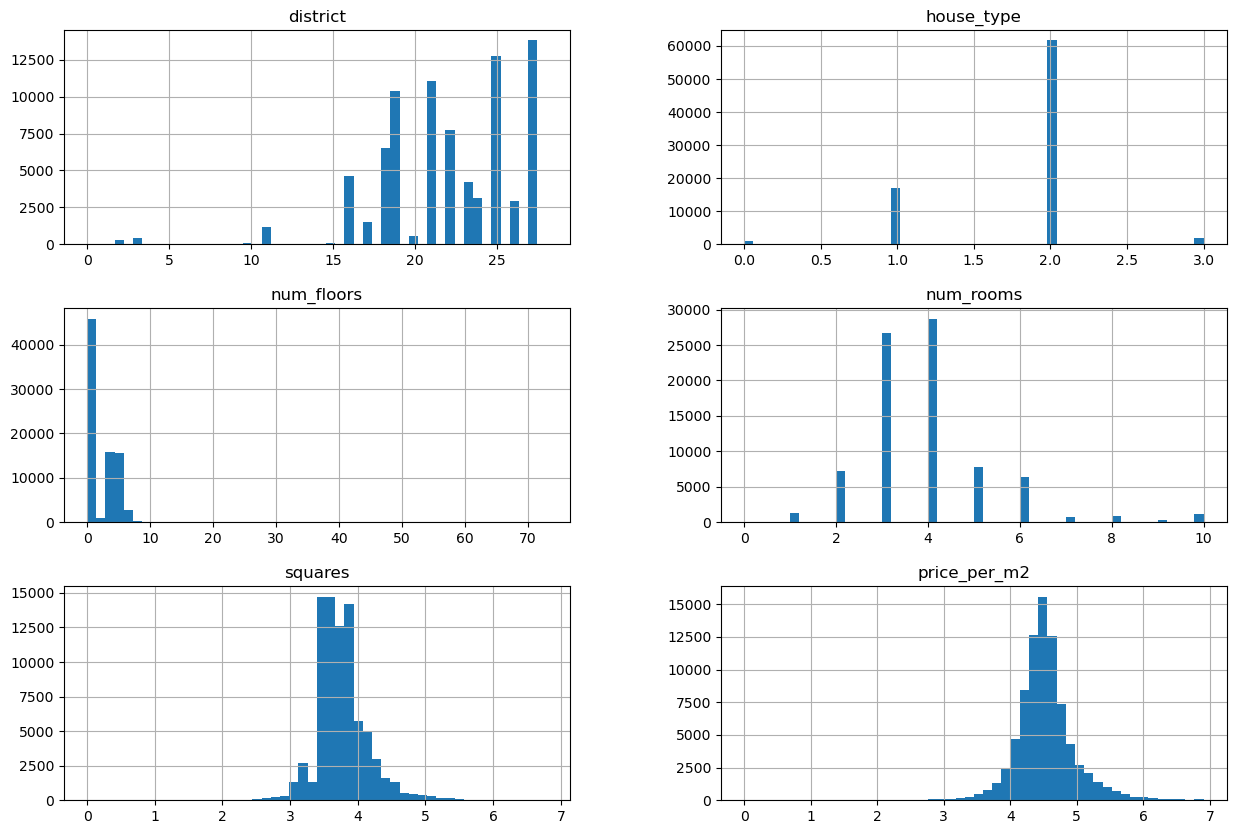

In [118]:

# df['paper_type'] = df['paper_type'].apply(lambda x: 0 if x == 'Chưa có sổ' else 1)
# log transformation
df_log = df.copy()

df_log[['price_per_m2', 'squares']] = np.log(df[['price_per_m2', 'squares']])

df_log.hist(bins=50, figsize=(15,10))
plt.show()

In [119]:
import statsmodels.api as sm

X = df_log.drop(['price_per_m2'], axis=1)
y = df_log['price_per_m2']


model1 = sm.OLS(y, X).fit()
model1.summary()

df_log['predicted_price'] = model1.predict(X)

In [120]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          9.592e+05
Date:                Thu, 18 May 2023   Prob (F-statistic):                        0.00
Time:                        14:21:23   Log-Likelihood:                         -72098.
No. Observations:               81430   AIC:                                  1.442e+05
Df Residuals:                   81425   BIC:                                  1.443e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
district       0.0546      0.000    122.946      0.000       0.054       0.055
house_type     0.1546      0.004     40.270      0.000       0.147       0.162
num_floors     0.0218      0.001     25.881      0.000       0.020       0.023
num_rooms      0.0580      0.002     37.679      0.000       0.055       0.061
squares        0.7301      0.003    229.257      0.000       0.724       0.736
==============================================================================
Omnibus:                    24090.613   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           358243.482
Skew:                          -1.018   Prob(JB):                         0.00
Kurtosis:                      13.072   Cond. No.                         47.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Conclusion:
    - **P(>|t|)**: p-value for these variables are less than 0.05 there are statistically significant association between price and there variables.
    - **p_value**: The model fits well with the observed data statistically.(p_value = 0.00)
    - **R-squared**: 0.983, which means that 98.3% of the variation in price is explained by these variables in the model.
    - **log(price_per_m2) = 0.06 * district + 0.16 * house_type + 0.02 * num_floors + 0.06 * num_rooms + 0.73 * squares**